In [63]:
import numpy as np
import pandas as pd
import pickle
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [64]:
#gr - ratio of groups
def get_group_ratio(df):
    df['gr'] = (df.f_tp + df.f_fp + df.f_tn + df.f_fn) / (df.m_tp + df.m_fp + df.m_tn + df.m_fn + df.f_tp + df.f_fp + df.f_tn + df.f_fn)
    return df

#ir - for real classes
def get_imbalance_ratio(df):
    df['ir'] =  (df.f_tp + df.f_fn + df.m_tp + df.m_fn) / (df.f_tn + df.f_fn + df.m_tn + df.m_fn + df.f_fp +df.f_tp + df.m_fp + df.m_tp)
    return df

def get_matrix_measures(df):
    df['m_tpr'] = df.m_tp/(df.m_tp + df.m_fn)
    df['f_tpr'] = df.f_tp/(df.f_tp + df.f_fn)
    df['m_ppv'] = df.m_tp/(df.m_tp + df.m_fp)
    df['f_ppv'] = df.f_tp/(df.f_tp + df.f_fp)
    df['m_npv'] = df.m_tn/(df.m_tn + df.m_fn)
    df['f_npv'] = df.f_tn/(df.f_tn + df.f_fn)
    df['m_fpr'] = df.m_fp/(df.m_fp + df.m_tn)
    df['f_fpr'] = df.f_fp/(df.f_fp + df.f_tn)

    #crucial moment
    df = df.replace(np.NaN, 0)
    
    return df
    
    
#equal opportunity
#ratio of true positive rates
def get_equal_opp_ratio(df):
    df['equal_opp_ratio'] = df.f_tpr / df.m_tpr
    return df


#equal opportunity
#difference of true positive rates
def get_equal_opp_diff(df):
    df["equal_opp_diff"] = df.f_tpr - df.m_tpr
    print(df)
    return df


#each group has the same probability of being classified with positive outcome
def get_statistical_parity(df):
    df["stat_parity"] = ((df.f_tp + df.f_fp)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) - ((df.m_tp + df.m_fp)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#similiar to statistical parity, but using ratio
def get_disparate_impact(df):
    df["disp_impact"] = ((df.f_tp + df.f_fp)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) / ((df.m_tp + df.m_fp)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#accuracy equality ratio
def get_acc_equality_ratio(df):
    df["acc_equality_ratio"] = ((df.f_tp + df.f_tn)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) / ((df.m_tp + df.m_tn)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#accuracy equality difference
def get_acc_equality_diff(df):
    df["acc_equality_diff"] = ((df.f_tp + df.f_tn)/(df.f_tp + df.f_fp + df.f_tn + df.f_fn)) - ((df.m_tp + df.m_tn)/(df.m_tp + df.m_fp + df.m_tn + df.m_fn))
    return df


#predictive equality ratio
def get_pred_equality_ratio(df):
    df["pred_equality_ratio"] = df.f_fpr / df.m_fpr
    return df


#predictive equality difference - false positive rate
def get_pred_equality_diff(df):
    df["pred_equality_diff"] = df.f_fpr - df.m_fpr
    return df


#positive predictive parity ratio
def get_pred_parity_ratio(df):
    df["pred_parity_ratio"] = df.f_ppv / df.m_ppv
    return df


#positive predictive parity difference
def get_pos_pred_parity_diff(df):
    df["pos_pred_parity_diff"] = df.f_ppv - df.m_ppv
    return df


#negative predictive parity difference
def get_neg_pred_parity_diff(df):
    df["neg_pred_parity_diff"] = df.f_npv / df.m_npv
    return df


#negative predictive parity difference
def get_neg_pred_parity_diff(df):
    df["neg_pred_parity_diff"] = df.f_npv - df.m_npv
    return df

In [65]:
fm_full_names = {
    'equal_opp_ratio': 'Equal Opportunity Ratio',
    'equal_opp_diff': 'Equal Opportunity Difference',
    'stat_parity': 'Statistical Parity',
    'disp_impact': 'Disparate Impact',
    'acc_equality_ratio': 'Accuracy Equality Ratio',
    'acc_equality_diff': 'Accuracy Equality Difference',
    'pred_equality_ratio': 'Predictive Equality Ratio',
    'pred_equality_diff': 'Predictive Equality Difference',
    'pred_parity_ratio': 'Predictive Parity Ratio',
    'pos_pred_parity_diff': 'Positive Predictive Parity Difference',
    'neg_pred_parity_diff': 'Negative Predictive Parity Difference'
}

In [66]:
def create_dataframe(X):
    
    df = pd.DataFrame(X, columns=['m_tp', 'm_fp', 'm_tn', 'm_fn', 'f_tp', 'f_fp', 'f_tn', 'f_fn'])
    
    df = get_group_ratio(df)
    df = get_imbalance_ratio(df)
    


    df.replace([np.inf, -np.inf], 0, inplace=True)
    df = get_matrix_measures(df)
    
    # calculate fairness measures - these with differences in definition
    df = get_equal_opp_diff(df)
    df = get_pred_equality_diff(df)
    
    df = get_acc_equality_diff(df)
    df = get_statistical_parity(df)

    df = get_pos_pred_parity_diff(df)
    df = get_neg_pred_parity_diff(df)
    
    print(df)
    return df

In [67]:
with open("Set(08,16).bin", "rb") as f:
    X = pickle.load(f)

In [68]:
df = create_dataframe(X)

here
        m_tp  m_fp  m_tn  m_fn  f_tp  f_fp  f_tn  f_fn      gr      ir  \
0         16     0     0     0     0     0     0     0  0.0000  1.0000   
1         15     1     0     0     0     0     0     0  0.0000  0.9375   
2         15     0     1     0     0     0     0     0  0.0000  0.9375   
3         15     0     0     1     0     0     0     0  0.0000  1.0000   
4         15     0     0     0     1     0     0     0  0.0625  1.0000   
...      ...   ...   ...   ...   ...   ...   ...   ...     ...     ...   
245152     0     0     0     0     0     0     4    12  1.0000  0.7500   
245153     0     0     0     0     0     0     3    13  1.0000  0.8125   
245154     0     0     0     0     0     0     2    14  1.0000  0.8750   
245155     0     0     0     0     0     0     1    15  1.0000  0.9375   
245156     0     0     0     0     0     0     0    16  1.0000  1.0000   

         m_tpr  f_tpr   m_ppv  f_ppv  m_npv   f_npv  m_fpr  f_fpr  
0       1.0000    NaN  1.0000    NaN  

In [69]:
df.ir.unique()

array([1.    , 0.9375, 0.875 , 0.8125, 0.75  , 0.6875, 0.625 , 0.5625,
       0.5   , 0.4375, 0.375 , 0.3125, 0.25  , 0.1875, 0.125 , 0.0625,
       0.    ])

In [70]:
ir_selected = [0.05, 0.25, 0.5, 0.75, 0.95]
gr_selected = [0.05, 0.25, 0.5, 0.75, 0.95]
df_selected = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected)]

In [71]:
df_selected = df_selected.replace(np.NaN, 0)
df_selected = df_selected.replace([np.inf, -np.inf], 0)
df_selected

,m_tp,m_fp,m_tn,m_fn,f_tp,f_fp,f_tn,f_fn,gr,ir,...,m_npv,f_npv,m_fpr,f_fpr,equal_opp_diff,pred_equality_diff,acc_equality_diff,stat_parity,pos_pred_parity_diff,neg_pred_parity_diff
315,12,0,0,0,0,4,0,0,0.25,0.75,...,0.0,0.000000,0.0,1.000,-1.0,1.000,-1.000000,0.000000,-1.0,0.000000
316,12,0,0,0,0,3,1,0,0.25,0.75,...,0.0,1.000000,0.0,0.750,-1.0,0.750,-0.750000,-0.250000,-1.0,1.000000
318,12,0,0,0,0,2,2,0,0.25,0.75,...,0.0,1.000000,0.0,0.500,-1.0,0.500,-0.500000,-0.500000,-1.0,1.000000
321,12,0,0,0,0,1,3,0,0.25,0.75,...,0.0,1.000000,0.0,0.250,-1.0,0.250,-0.250000,-0.750000,-1.0,1.000000
325,12,0,0,0,0,0,4,0,0.25,0.75,...,0.0,1.000000,0.0,0.000,-1.0,0.000,0.000000,-1.000000,-1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242111,0,0,0,4,0,1,7,4,0.75,0.50,...,0.0,0.636364,0.0,0.125,0.0,0.125,0.583333,0.083333,0.0,0.636364
242115,0,0,0,4,0,1,3,8,0.75,0.75,...,0.0,0.272727,0.0,0.250,0.0,0.250,0.250000,0.083333,0.0,0.272727
242119,0,0,0,4,0,0,12,0,0.75,0.25,...,0.0,1.000000,0.0,0.000,0.0,0.000,1.000000,0.000000,0.0,1.000000
242123,0,0,0,4,0,0,8,4,0.75,0.50,...,0.0,0.666667,0.0,0.000,0.0,0.000,0.666667,0.000000,0.0,0.666667


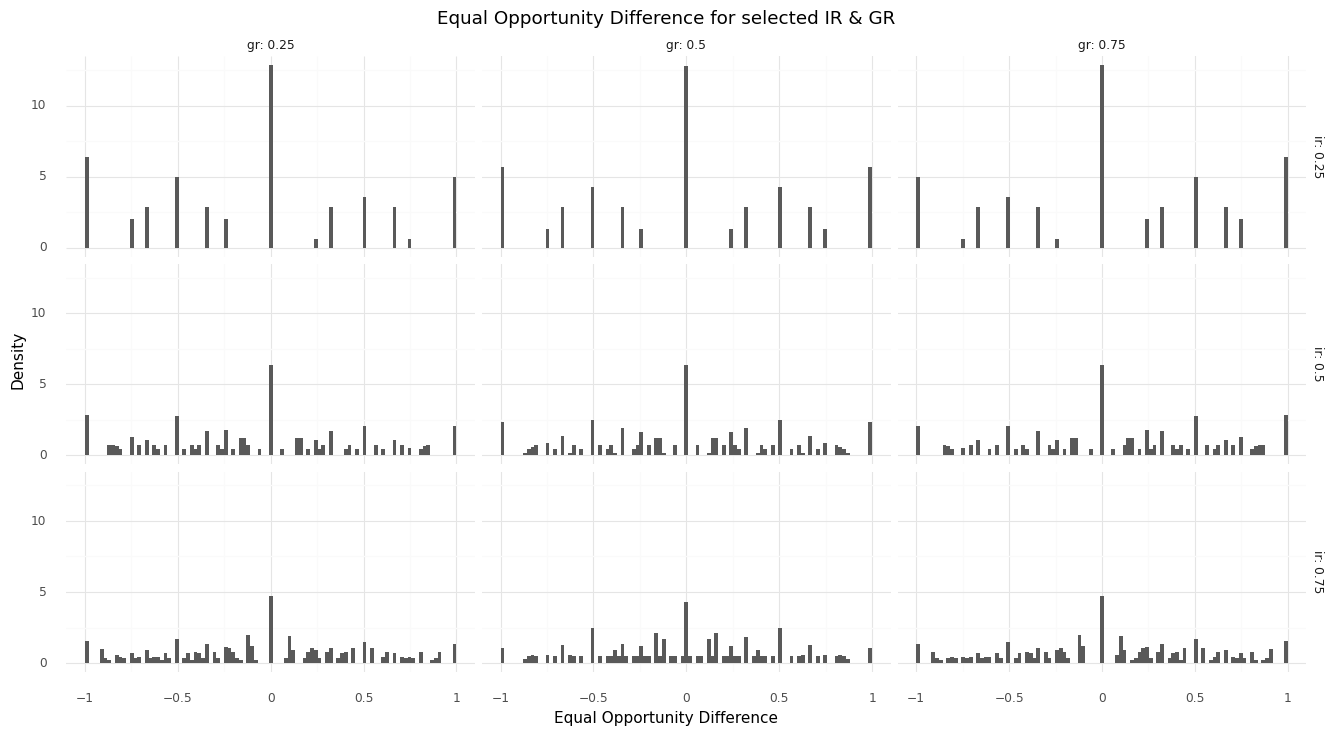

FileNotFoundError: [Errno 2] No such file or directory: 'plots/histogram_ir_gr_equal_opp_diff.png'

In [72]:
for metric in ["equal_opp_diff", "acc_equality_diff", "stat_parity", "pred_equality_diff", "pos_pred_parity_diff", "neg_pred_parity_diff"]:
    title = fm_full_names.get(metric)
    fig = (
        ggplot(df_selected, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('ir~gr', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + xlab(title)
        + ylab("Density")
        + ggtitle(f"{title} for selected IR & GR")
    )
    print(fig)
    fig.save(filename=f"plots/histogram_ir_gr_{metric}.png")

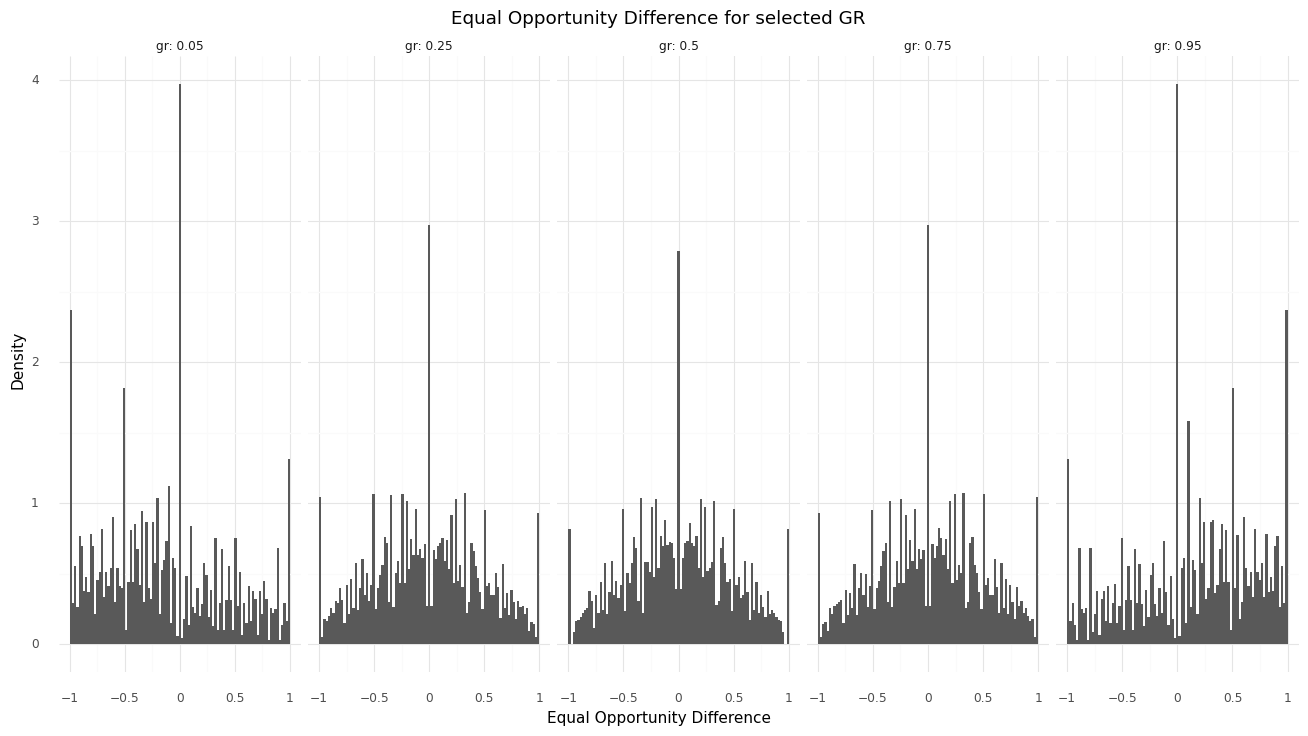

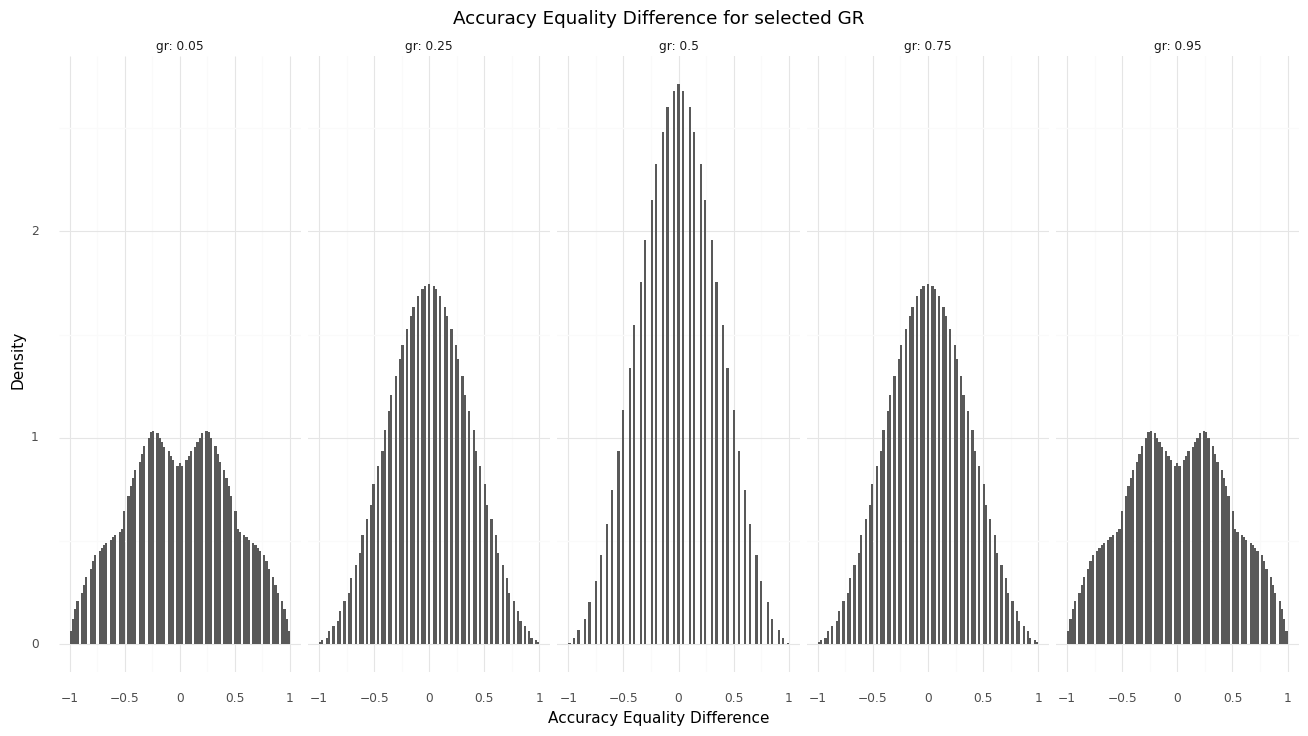

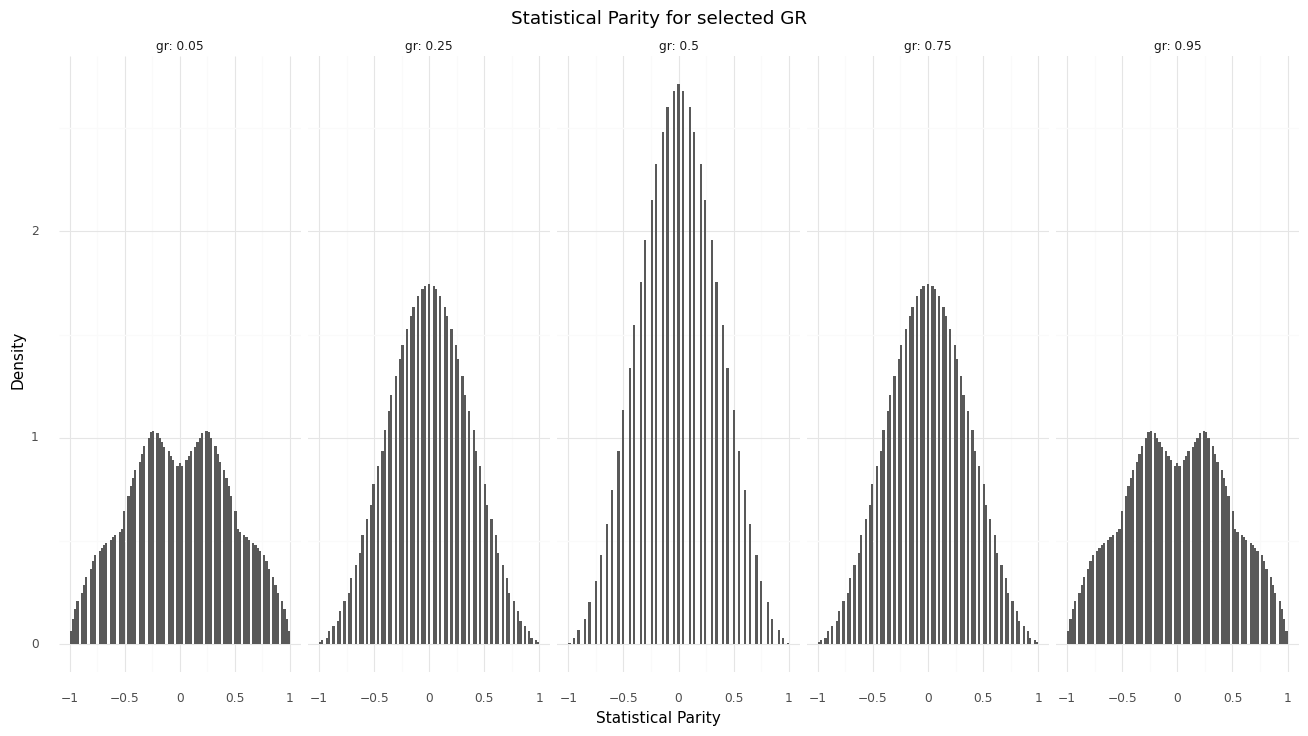

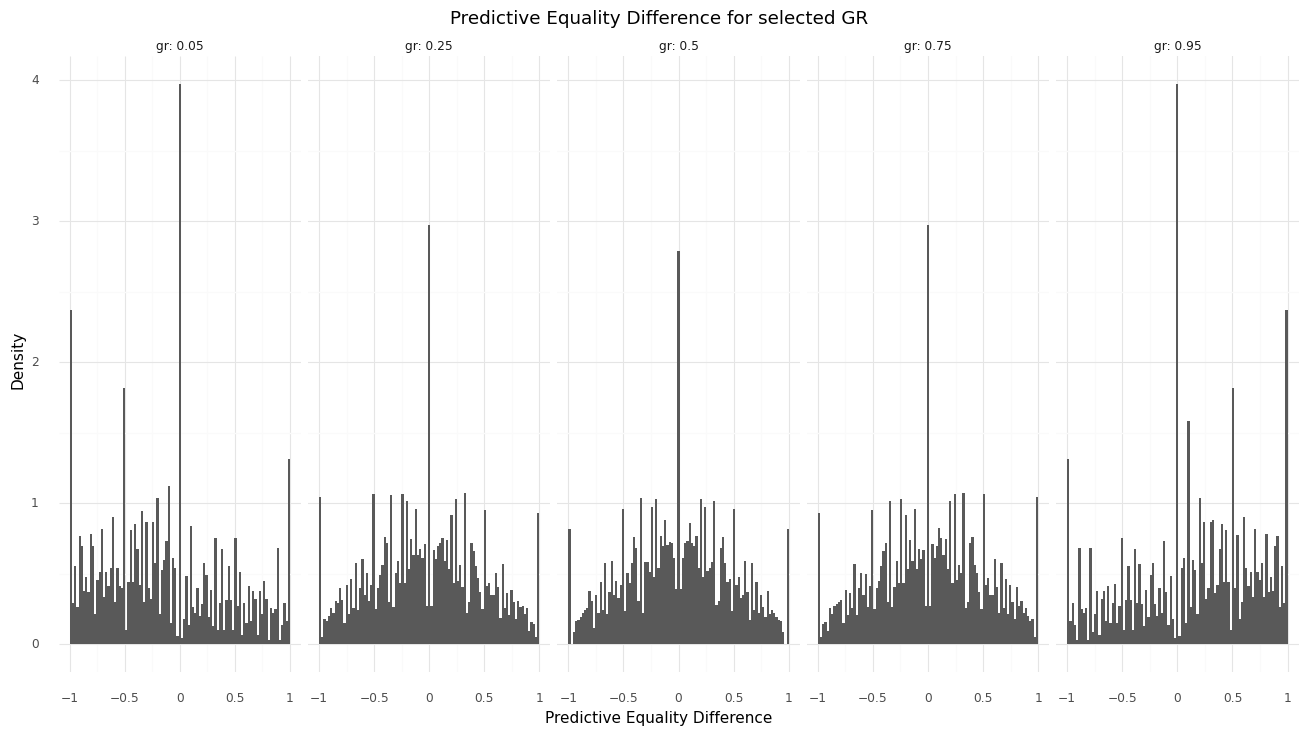

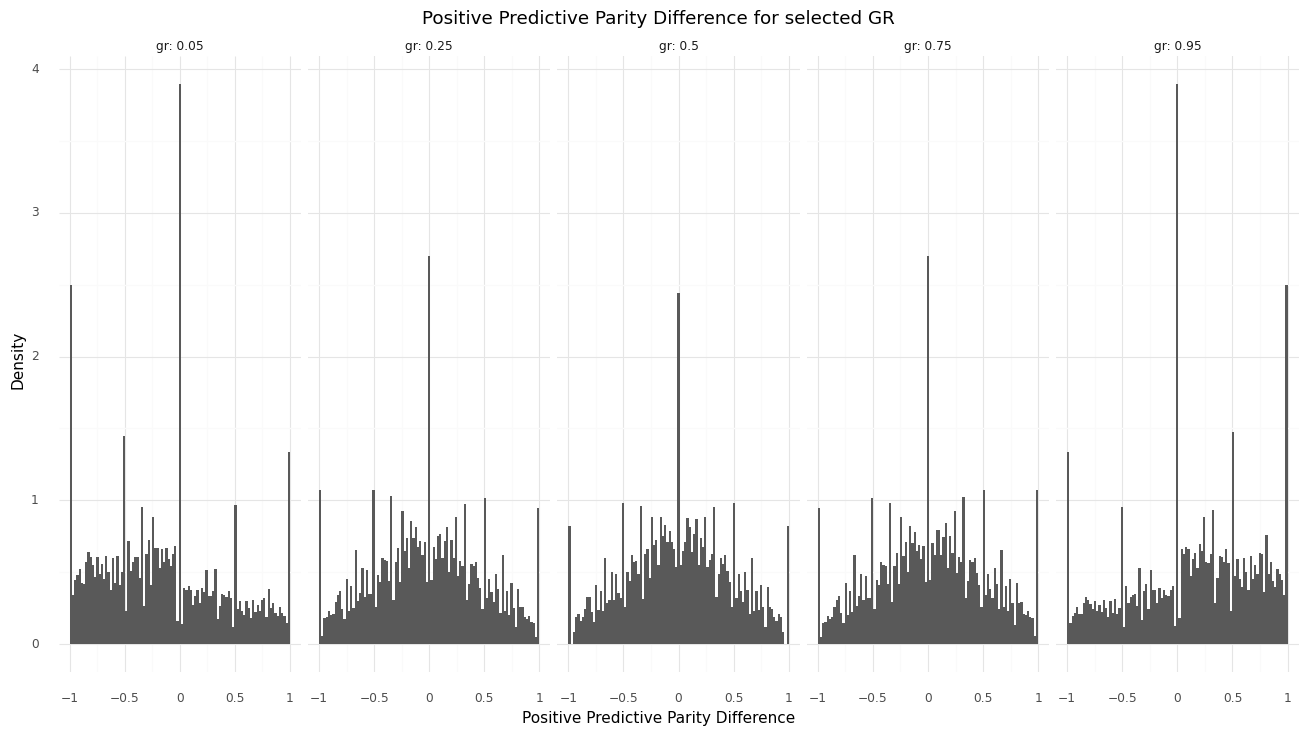

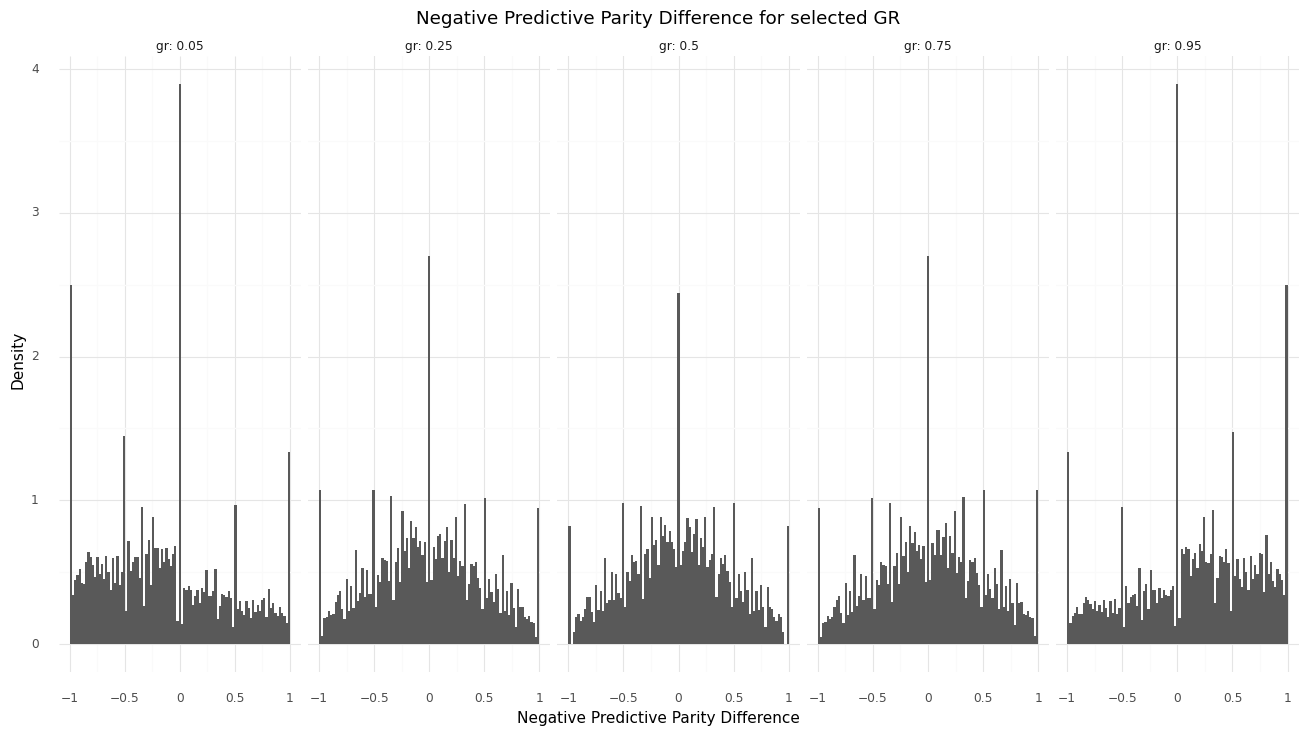

In [ ]:
for metric in ["equal_opp_diff", "acc_equality_diff", "stat_parity", "pred_equality_diff", "pos_pred_parity_diff", "neg_pred_parity_diff"]:
    title = fm_full_names.get(metric)
    fig = (
        ggplot(df_selected, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('.~gr', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + xlab(title)
        + ylab("Density")
        + ggtitle(f"{title} for selected GR")
    )
    print(fig)
    fig.save(filename=f"plots/histogram_gr_{metric}.png")


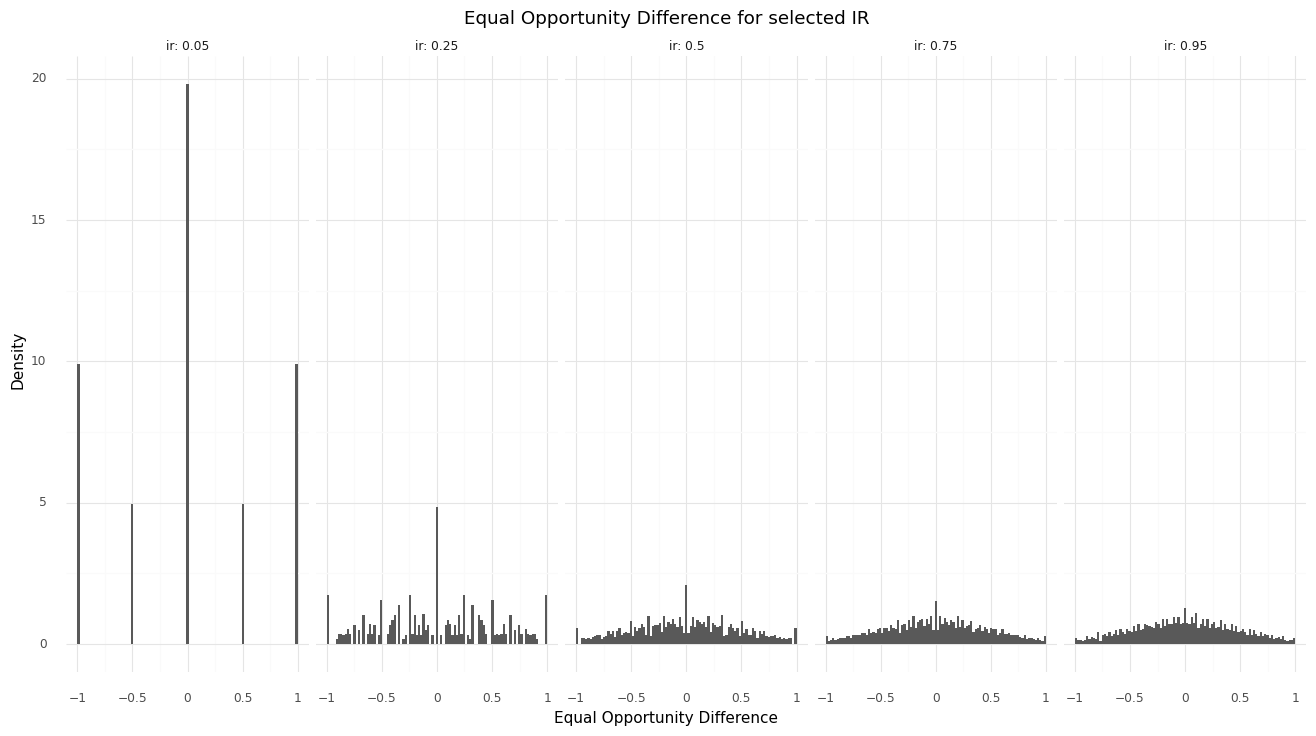

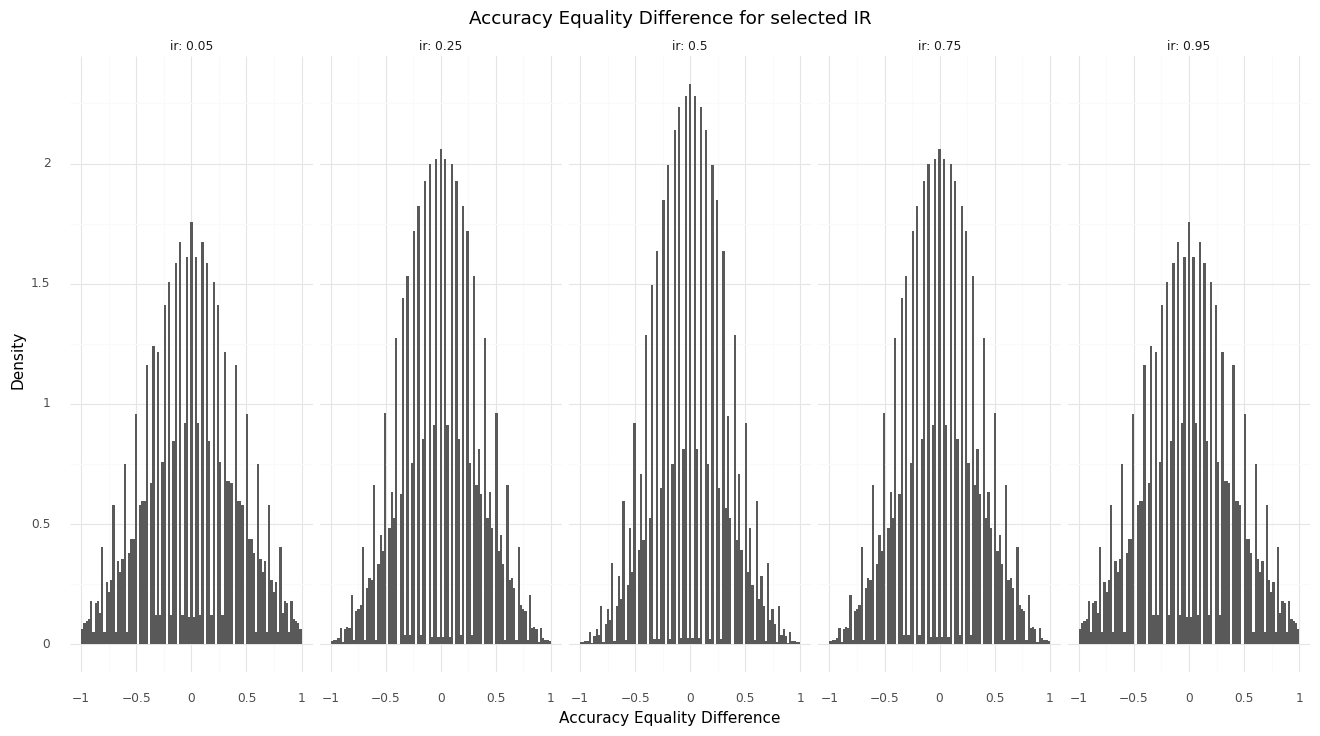

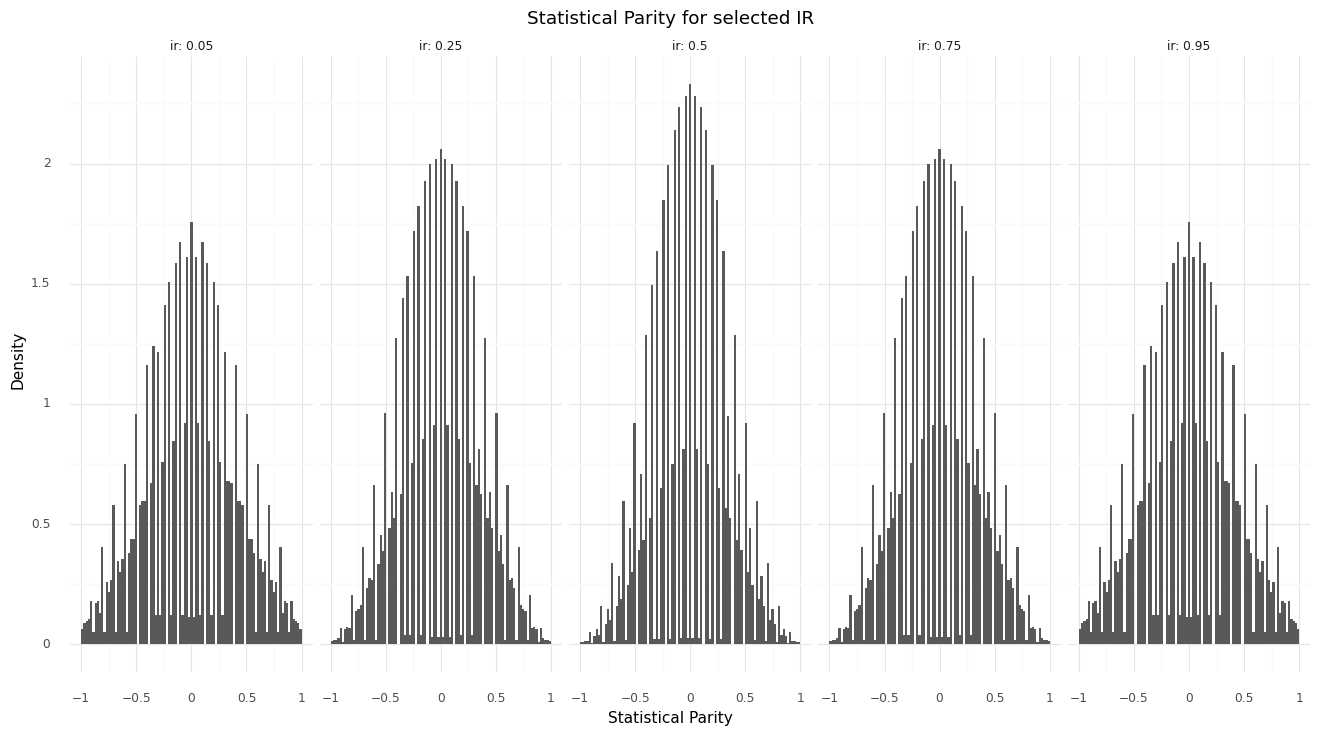

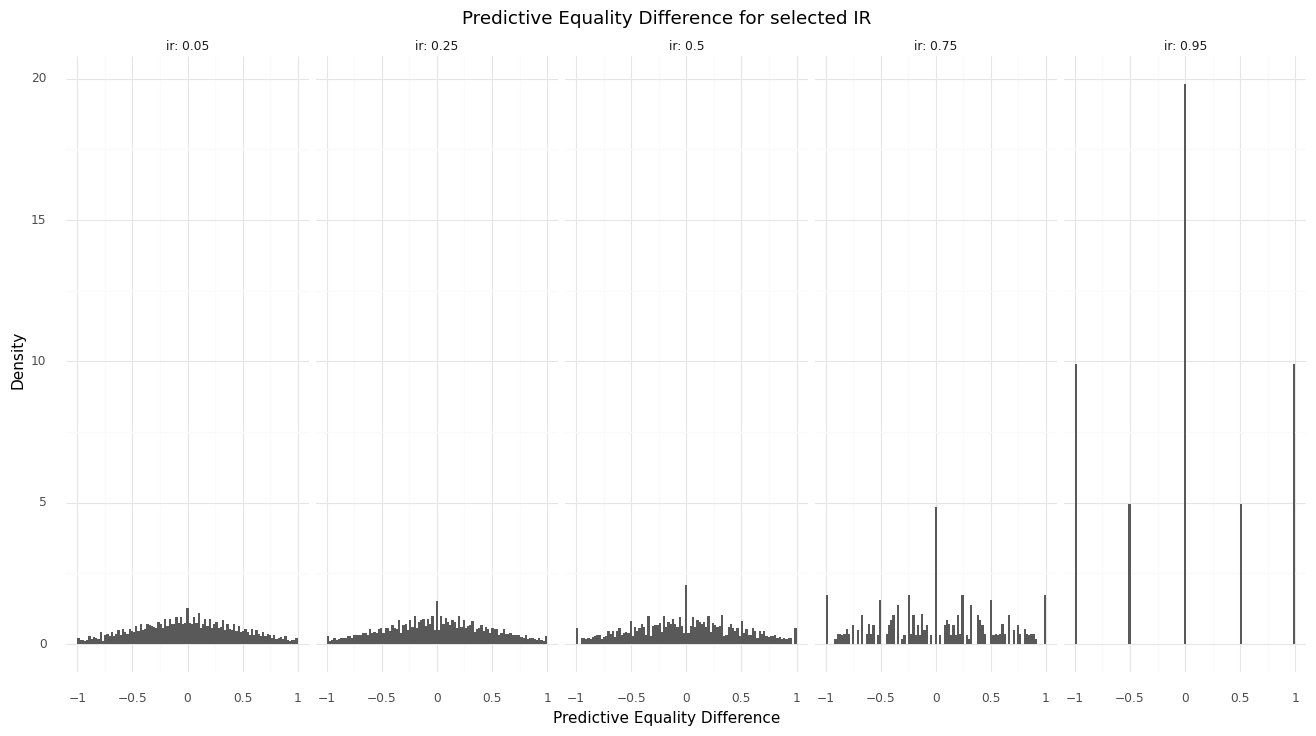

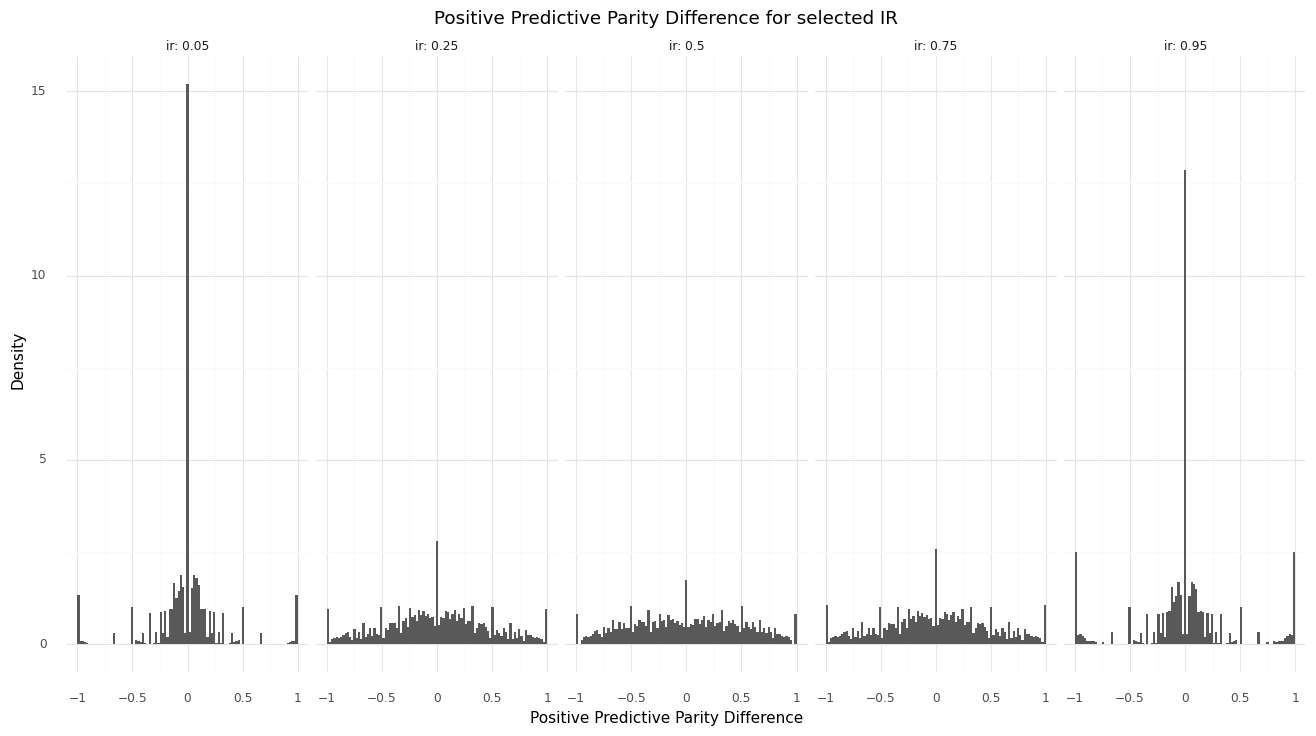

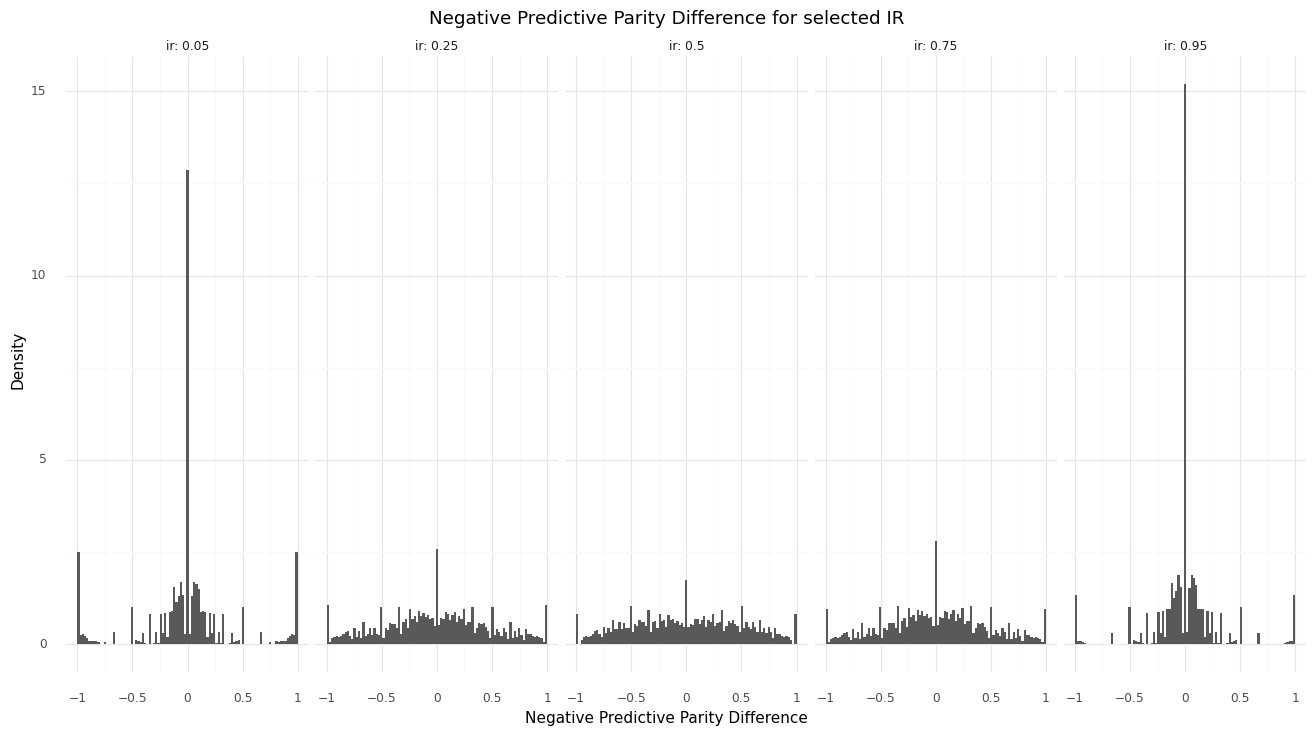

In [ ]:
for metric in ["equal_opp_diff", "acc_equality_diff", "stat_parity", "pred_equality_diff", "pos_pred_parity_diff", "neg_pred_parity_diff"]:
    title = fm_full_names.get(metric)
    fig = (
        ggplot(df_selected, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('.~ir', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + xlab(title)
        + ylab("Density")
        + ggtitle(f"{title} for selected IR")
    )
    print(fig)
    fig.save(filename=f"plots/histogram_ir_{metric}.png")
